In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1: Flowers, irises and penguins

## Part 1: The Iris Dataset

In [2]:
# load the iris dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice-bis/master/Data/iris.csv'
data = pd.read_csv(url)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

**Part 1-a:** Cluster the flowers using k-means, and ensure that you have a good number of clusters (using the "elbow" method, for example).

In [3]:
def kmeans(X,k,max_iterations=1000):
    from sklearn.metrics import pairwise_distances
    # initialize iteration counter
    it = 0
    repeat = True
    
    # number of datapoints
    m = X.shape[0] 
    
    # initialization
    means = X[np.random.choice(m,k,replace=False)] 
    dist = pairwise_distances(X,means)
    clusters = np.argmin(dist, axis=1)
 
    
    while repeat and it<max_iterations:
        
        # update means; # if a cluster has no data points associated with it, replace it with a random data point
        means = np.array([np.mean(X[clusters==i], axis=0) 
                          if np.sum(clusters==i)!=0
                          else  X[np.random.randint(m)]
                          for i in range(k)])
        
        # update clusters
        dist = pairwise_distances(X,means)
        new_clusters = np.argmin(dist, axis=1)
        
        # check if the new clusters are equal to the previous clusters
        if np.sum(clusters!=new_clusters)==0: 
            repeat = False
        clusters = new_clusters
                
        it += 1 # increment iteration counter by 1
    
    return clusters, means

In [7]:
def inertia(X,means,clusters,k):
    m = len(clusters)
    return np.sum([np.sum((X[clusters==i]-means[i])**2) for i in range(k)])/m

Text(0, 0.5, 'inertia')

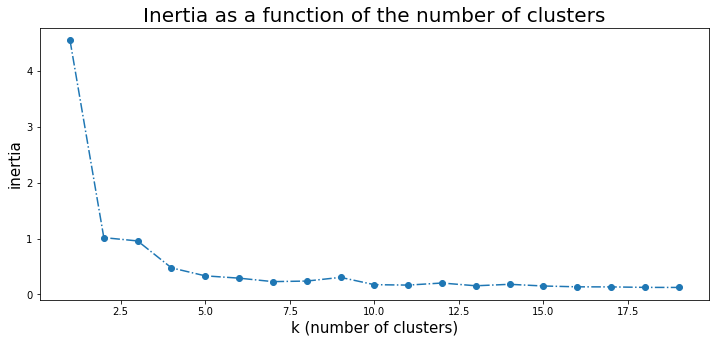

In [8]:
k_min = 1
k_max = 20
inertias = np.zeros(k_max-k_min)
for i,k in enumerate(range(k_min,k_max)):
    clusters,means = kmeans(X,k)
    inertias[i] = inertia(X,means,clusters,k)
    
plt.figure(figsize=(12,5))
plt.plot(range(k_min,k_max),inertias,'o-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

In [9]:
k = 3 
clusters,means = kmeans(X,k)

**Part 1-b:** Check that each cluster corresponds to a different iris species.

In [13]:
data.loc[clusters==0].species.value_counts()

Iris-versicolor    48
Iris-virginica     14
Name: species, dtype: int64

In [14]:
data.loc[clusters==1].species.value_counts()

Iris-setosa    50
Name: species, dtype: int64

In [15]:
data.loc[clusters==2].species.value_counts()

Iris-virginica     36
Iris-versicolor     2
Name: species, dtype: int64

## Part 2: The Palmer Archipelago Penguin Data

In [16]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
# drop NaNs
data.dropna(axis=0, inplace=True)

In [21]:
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

In [22]:
# scale the data
X = X/np.abs(np.max(X,axis=0))

**Part 2-a:** Cluster the penguins using k-means, and ensure that you have a good number of clusters (using the "elbow" method, for example).

Text(0, 0.5, 'inertia')

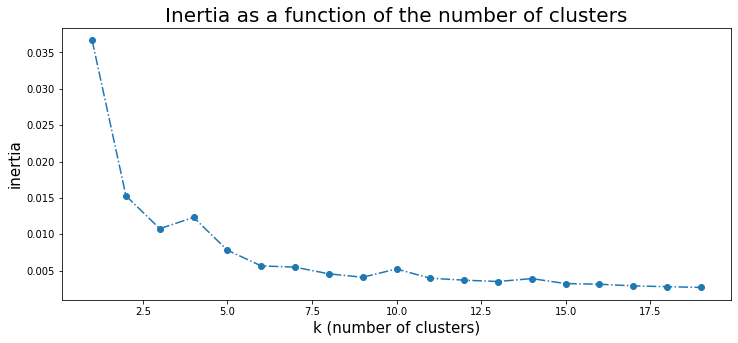

In [23]:
k_min = 1
k_max = 20
inertias = np.zeros(k_max-k_min)
for i,k in enumerate(range(k_min,k_max)):
    clusters,means = kmeans(X,k)
    inertias[i] = inertia(X,means,clusters,k)
    
plt.figure(figsize=(12,5))
plt.plot(range(k_min,k_max),inertias,'o-.')
plt.title('Inertia as a function of the number of clusters',fontsize=20)
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

**Part 2-b:** Check that each cluster corresponds to a different penguin species.

In [24]:
k = 3 
clusters,means = kmeans(X,k)

In [25]:
data.loc[clusters==0].species.value_counts()

Gentoo       57
Chinstrap     1
Name: species, dtype: int64

In [26]:
data.loc[clusters==1].species.value_counts()

Adelie       146
Chinstrap     67
Name: species, dtype: int64

In [27]:
data.loc[clusters==2].species.value_counts()

Gentoo    63
Name: species, dtype: int64

## Part 3: Clustering flower images

**Part 3-a:** Download the flowers.npy matrix (click [here](https://github.com/um-perez-alvaro/Data-Science-Theory/blob/master/Data/flowers.npy?raw=true))

In [36]:
# load the data; # change the path to the path where flowers.pny is located
path = 'flowers.npy' 
X = np.load(path)
X.shape

(61, 49152)

Each row of X is a image of a flower.
Each image is of shape 128x128x3 (height x width x number of color channels).

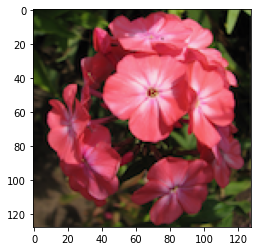

In [37]:
image = X[0].reshape(128,128,3)
plt.imshow(image)

There are 61 images of 3 different species of flowers

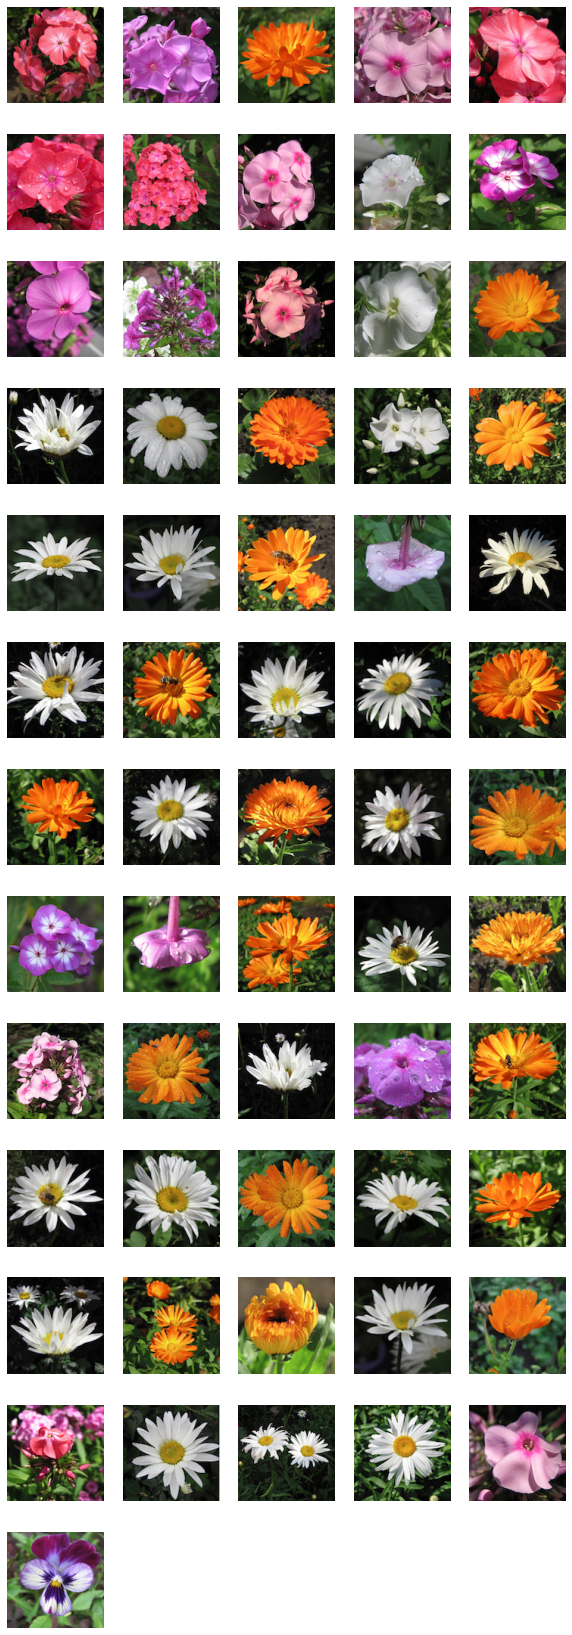

In [38]:
plt.figure(figsize=(10,30))
m = 61
n_cols = 5
n_rows = (m - 1) // n_cols + 1
for i in range(m):
    flower = X[i].reshape(128,128,3)
    plt.subplot(n_rows, n_cols,i+1)
    plt.imshow(flower)
    plt.axis('off')
plt.show()

Cluster the flower images using k-means with k=3.

In [47]:
k = 3
clusters,means = kmeans(X,k)

Run the following cell to display the 3 clusters.

Cluster 0


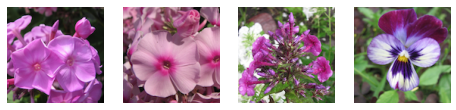

Cluster 1


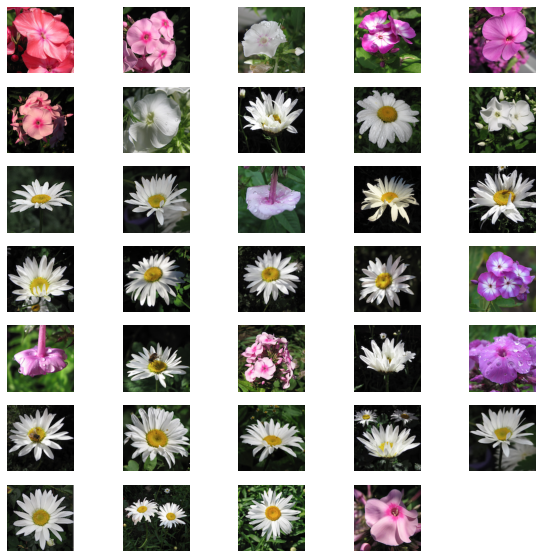

Cluster 2


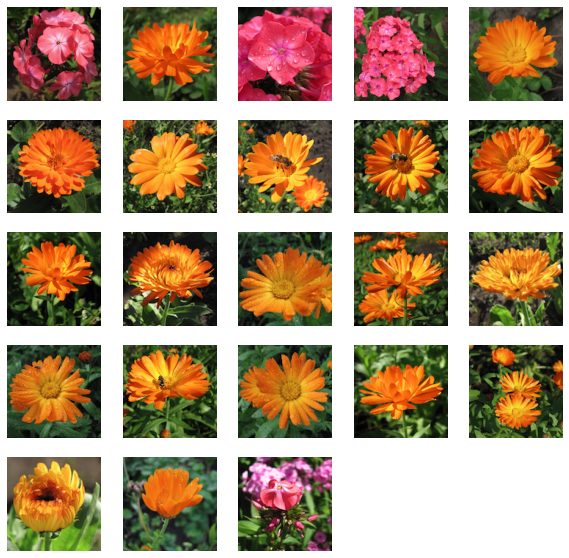

In [48]:
for i in range(3):
    plt.figure(figsize=(10,10))
    print("Cluster", i)
    n_images = np.sum(clusters==i)
    n_cols = 5
    n_rows = (n_images - 1) // n_cols + 1
    cluster_flowers = X[clusters==i]
    for j in range(n_images):
        flower = cluster_flowers[j].reshape(128,128,3)
        plt.subplot(n_rows, n_cols,j+1)
        plt.imshow(flower)
        plt.axis('off')
    plt.show()